# NARTHANA S - 21MIA1124

# Step 1: Feature Extraction from Segmented Objects

Step 1: Feature Extraction from Segmented Objects 

Segment the Image 

Segmentation is the process of dividing an image into parts or regions, usually by separating the objects of interest from the background. 

How to Do It: Use techniques like thresholding, edge detection, or more advanced methods like watershed or contour-based segmentation. 

Example: 

Thresholding: Converts the image to binary (black and white) based on a certain intensity value. 

Identify the Objects of Interest 

After segmentation, identify the specific objects in the image. Each object will be a separate region or set of pixels. 

How to Do It: You can use contours or connected component analysis to label and isolate each object.  

Contours: Finds the outlines of objects in the image. 

Extract Features from Each Object 

Once the objects are isolated, you can extract features from each segmented object. 

Feature Types: 

Shape Features: Describe the geometry of the object. 

Area: The number of pixels inside the object. 

Perimeter: The length of the boundary of the object. 

Bounding Box: The smallest rectangle that can enclose the object. 

Centroid: The center of the object. 

Edge Features: Extract edges within the segmented object. 

How to Do It: Apply edge detection (e.g., Canny) only to the pixels within the object's region. 

Texture Features: Analyze the surface quality of the object. 

How to Do It: Compute texture descriptors like Local Binary Pattern (LBP) or Gray-Level Co-occurrence Matrix (GLCM) for the object's pixels. 

Color Features: If working with color images, analyze the color distribution within the object. 

How to Do It: Compute color histograms or color moments for the segmented object. 

Analyze and Use the Features 

Once the features are extracted, you can analyze them for tasks like object recognition, classification, or further image analysis. 

For example, you might compare the shape or texture features of different objects to classify them into categories. 

 Segment the Image

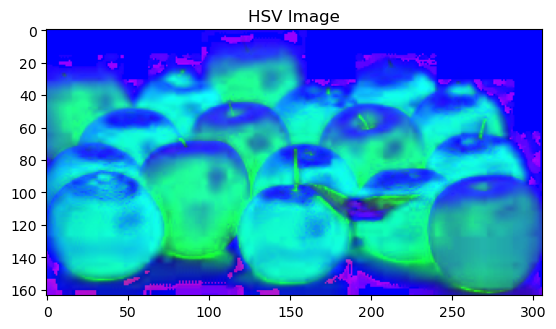

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:\\Users\\Narthana\\Downloads\\images (1).jpeg")

# Convert to RGB (since OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Display the HSV image
plt.imshow(hsv_image)
plt.title("HSV Image")
plt.show()


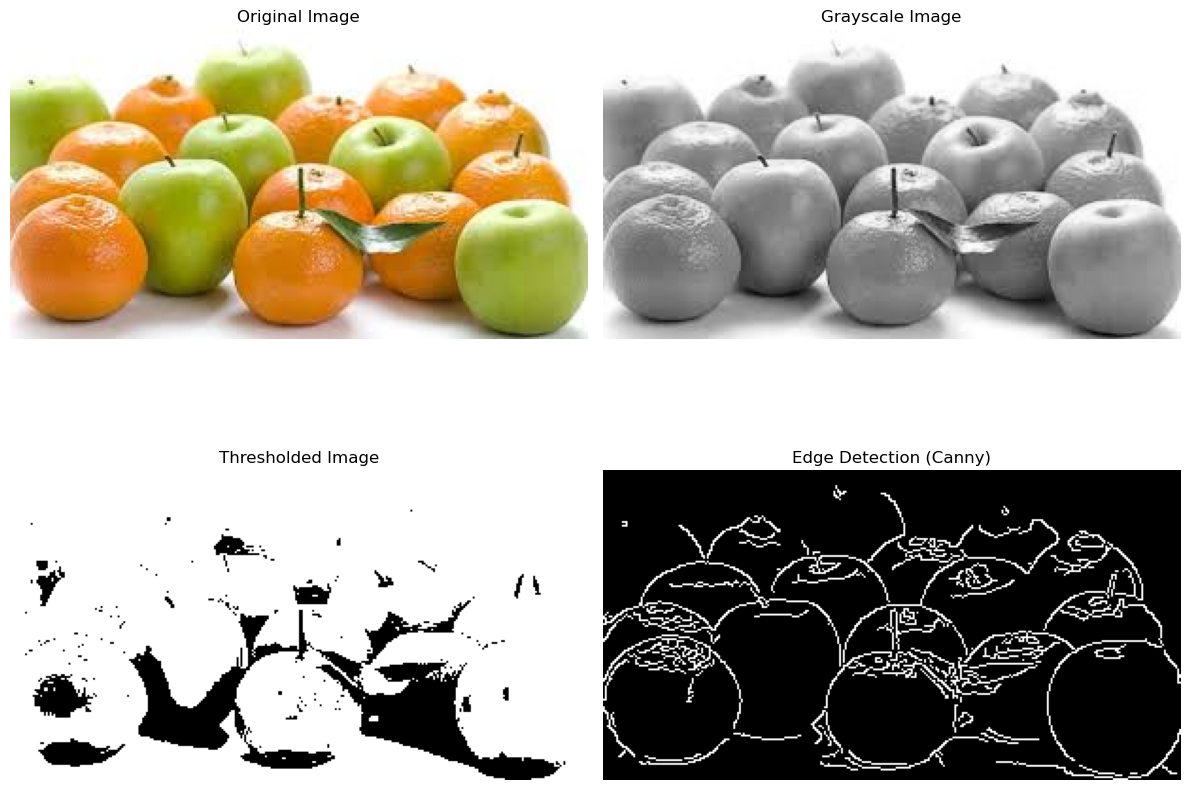

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:\\Users\\Narthana\\Downloads\\images (1).jpeg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Grayscale Image
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

# Thresholded Image
axes[1, 0].imshow(binary, cmap='gray')
axes[1, 0].set_title('Thresholded Image')
axes[1, 0].axis('off')

# Edge Detected Image
axes[1, 1].imshow(edges, cmap='gray')
axes[1, 1].set_title('Edge Detection (Canny)')
axes[1, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Thresholding to Segment Oranges and Apples

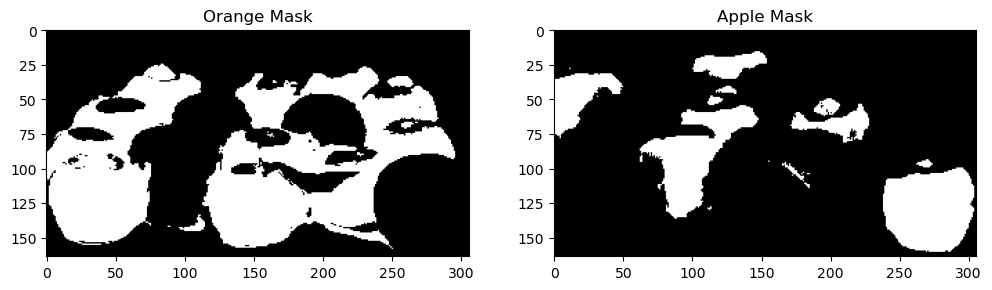

In [2]:
# Define color range for oranges (in HSV)
orange_lower = np.array([10, 100, 100])
orange_upper = np.array([25, 255, 255])

# Define color range for green apples (in HSV)
apple_lower = np.array([30, 100, 100])
apple_upper = np.array([85, 255, 255])

# Create masks for oranges and apples
mask_orange = cv2.inRange(hsv_image, orange_lower, orange_upper)
mask_apple = cv2.inRange(hsv_image, apple_lower, apple_upper)

# Display the masks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange Mask")
plt.subplot(1, 2, 2)
plt.imshow(mask_apple, cmap='gray')
plt.title("Apple Mask")
plt.show()


2. Identify the Objects of Interest

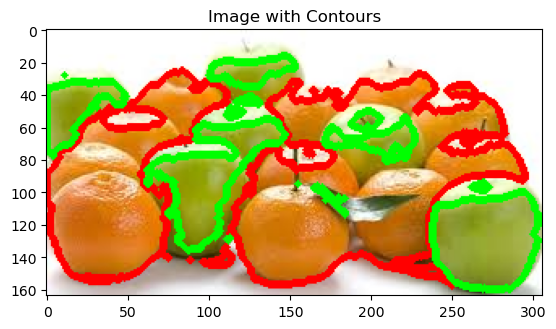

In [3]:
# Find contours for oranges
contours_orange, _ = cv2.findContours(mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find contours for apples
contours_apple, _ = cv2.findContours(mask_apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = image_rgb.copy()

# Draw orange contours
cv2.drawContours(image_with_contours, contours_orange, -1, (255, 0, 0), 3)  # Blue color for oranges

# Draw apple contours
cv2.drawContours(image_with_contours, contours_apple, -1, (0, 255, 0), 3)  # Green color for apples

# Display the image with contours
plt.imshow(image_with_contours)
plt.title("Image with Contours")
plt.show()


3. Extract Features from Each Object

In [4]:
# Function to calculate features for each contour
def calculate_features(contours, object_name):
    features = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        features.append({
            'Object': object_name,
            'Area': area,
            'Perimeter': perimeter,
            'Bounding Box': (x, y, w, h)
        })
    return features

# Calculate features for oranges
orange_features = calculate_features(contours_orange, "Orange")

# Calculate features for apples
apple_features = calculate_features(contours_apple, "Apple")

# Print the extracted features
for feature in orange_features + apple_features:
    print(feature)


{'Object': 'Orange', 'Area': 0.0, 'Perimeter': 2.0, 'Bounding Box': (88, 142, 2, 1)}
{'Object': 'Orange', 'Area': 65.0, 'Perimeter': 54.62741661071777, 'Bounding Box': (96, 134, 19, 12)}
{'Object': 'Orange', 'Area': 1.5, 'Perimeter': 11.071067690849304, 'Bounding Box': (160, 75, 5, 3)}
{'Object': 'Orange', 'Area': 0.0, 'Perimeter': 0.0, 'Bounding Box': (160, 74, 1, 1)}
{'Object': 'Orange', 'Area': 0.0, 'Perimeter': 2.0, 'Bounding Box': (267, 67, 2, 1)}
{'Object': 'Orange', 'Area': 20.5, 'Perimeter': 21.071067690849304, 'Bounding Box': (257, 67, 9, 5)}
{'Object': 'Orange', 'Area': 1.5, 'Perimeter': 5.414213538169861, 'Bounding Box': (164, 37, 3, 2)}
{'Object': 'Orange', 'Area': 95.0, 'Perimeter': 44.627416372299194, 'Bounding Box': (247, 34, 19, 8)}
{'Object': 'Orange', 'Area': 13543.5, 'Perimeter': 977.4772635698318, 'Bounding Box': (113, 27, 183, 132)}
{'Object': 'Orange', 'Area': 7078.0, 'Perimeter': 615.6711342334747, 'Bounding Box': (0, 25, 112, 131)}
{'Object': 'Apple', 'Area': 1.

# Step 2 : Object Detection using the extracted features 

Step 2 : Object Detection using the extracted features 

1. Extract Features from a Reference Object 

First, you need a reference object, which is the object you want to detect in other images. 

Extract features from this reference object as described previously (shape, edge, texture, color). 

2. Extract Features from the Target Image 

Segment the target image where you want to detect the object. 

Extract the same set of features from all segmented regions or objects in the target image. 

3. Compare Features for Object Detection 

Compare the features extracted from the reference object with the features extracted from each segmented object in the target image. 

Use similarity measures to find the closest match. Here’s how you can do it: 

Similarity Measures: 

Euclidean Distance: Compare feature vectors by calculating the Euclidean distance. The smaller the distance, the more similar the objects are. 

Correlation: Measure the correlation between feature vectors. Higher correlation means higher similarity. 

Histogram Comparison: If using color histograms, compare them using methods like Chi-square or Intersection. 

4. Locate and Identify the Object 

Once you find the best match (i.e., the segmented object with features most similar to the reference object), you can identify and locate the object in the target image. 

Mark the detected object using bounding boxes or contours. 

5. Visualize the Results 

Draw the bounding box or highlight the detected object in the target image to show the result of the object detection. 

Finally based on the objects and features matching the target image label them and create a labelled dataset. 

 

Similarity Measures: 

Euclidean Distance: Compare feature vectors by calculating the Euclidean distance. The smaller the distance, the more similar the objects are. 

In [5]:
from scipy.spatial import distance

# Example: Calculate Euclidean distance between two objects' features (area and perimeter)
def euclidean_distance(obj1, obj2):
    return distance.euclidean([obj1['Area'], obj1['Perimeter']], [obj2['Area'], obj2['Perimeter']])

# Compare features of first orange and first apple
dist = euclidean_distance(orange_features[0], apple_features[0])
print(f"Euclidean Distance between the first orange and the first apple: {dist}")


Euclidean Distance between the first orange and the first apple: 4.4999999315429156


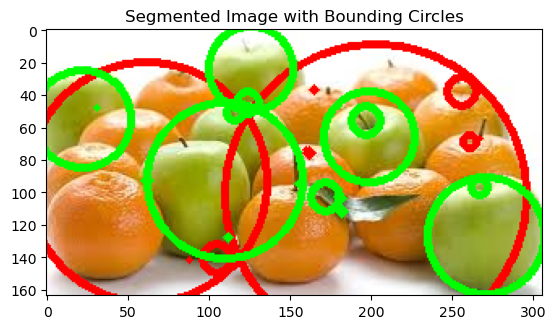

In [6]:
# Draw bounding circles for oranges
for contour in contours_orange:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_rgb, center, radius, (255, 0, 0), 3)  # Blue color in RGB

# Draw bounding circles for apples
for contour in contours_apple:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_rgb, center, radius, (0, 255, 0), 3)  # Green color in RGB

# Display the image with bounding circles
plt.imshow(image_rgb)
plt.title("Segmented Image with Bounding Circles")
plt.show()


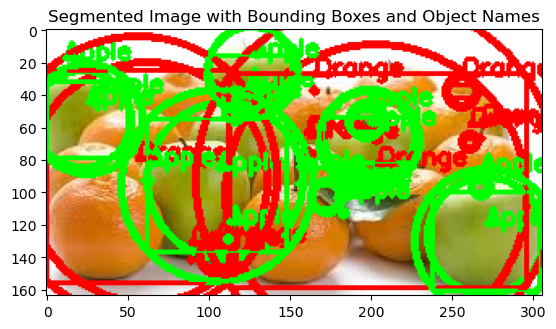

In [17]:
# Draw bounding boxes with object names for oranges
for feature in orange_features:
    x, y, w, h = feature['Bounding Box']
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 1)  # Blue color in RGB
    contour = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.int32)
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_rgb, center, radius, (255, 0, 0), 2)  # Blue color in RGB
    cv2.putText(image_rgb, "Orange", (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.1, (255, 0, 0), 2)

# Draw bounding boxes with object names for apples
for feature in apple_features:
    x, y, w, h = feature['Bounding Box']
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 1)  # Green color in RGB
    contour = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.int32)
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image_rgb, center, radius, (0, 255, 0), 2)  # Green color in RGB
    cv2.putText(image_rgb, "Apple", (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.1, (0, 255, 0), 2)

# Display the image with bounding boxes and object names
plt.imshow(image_rgb)
plt.title("Segmented Image with Bounding Boxes and Object Names")
plt.show()

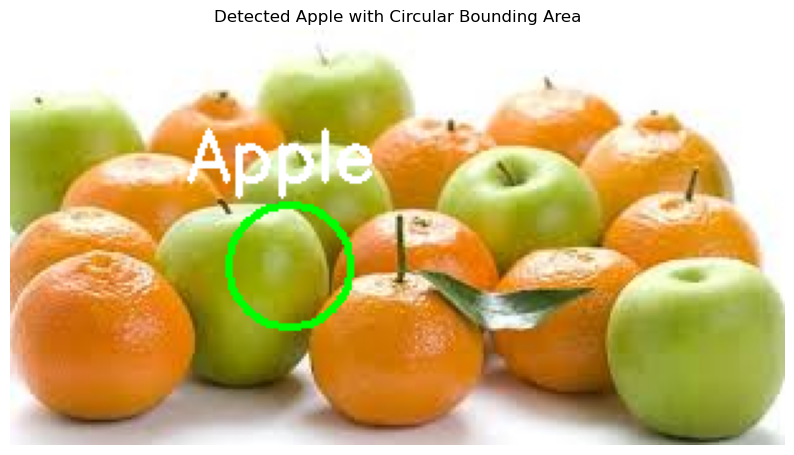

Detected fruit: Apple
Detected object center: (110, 93)
Detected object radius: 24


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming the image loading and preprocessing steps remain the same
# ...

# Find contours for both oranges and apples
contours_orange, _ = cv2.findContours(mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_apple, _ = cv2.findContours(mask_apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to find a single fruit in the bottom-left area
def find_single_fruit(contours, image_shape):
    height, width = image_shape[:2]
    best_contour = None
    best_score = float('inf')
    
    for contour in contours:
        if cv2.contourArea(contour) < 1000:  # Filter small contours
            continue
        
        x, y, w, h = cv2.boundingRect(contour)
        score = (x + y) - (w * h * 0.1)  # Prefer larger fruits
        
        if score < best_score:
            best_score = score
            best_contour = contour
    
    return best_contour

# Find a single fruit from each category
target_orange = find_single_fruit(contours_orange, image_rgb.shape)
target_apple = find_single_fruit(contours_apple, image_rgb.shape)

# Determine which fruit is closer to the bottom-left corner
def get_bottom_left_score(contour):
    x, y, w, h = cv2.boundingRect(contour)
    return x + y

orange_score = get_bottom_left_score(target_orange) if target_orange is not None else float('inf')
apple_score = get_bottom_left_score(target_apple) if target_apple is not None else float('inf')

if orange_score < apple_score:
    target_fruit = target_orange
    fruit_label = "Orange"
else:
    target_fruit = target_apple
    fruit_label = "Apple"

# Find the minimum enclosing circle for the target fruit
(x, y), radius = cv2.minEnclosingCircle(target_fruit)
center = (int(x), int(y))
radius = int(radius * 0.5)  # Reduce radius by 20%

# Create a copy of the original image for drawing
result_image = image_rgb.copy()

# Draw the circular bounding area
cv2.circle(result_image, center, radius, (0, 255, 0), 2)  # Green circle

# Add label to the image
label_position = (center[0] - 40, center[1] - radius - 10)  # Adjust position as needed
cv2.putText(result_image, fruit_label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Display the result
plt.figure(figsize=(10, 8))
plt.imshow(result_image)
plt.title(f"Detected {fruit_label} with Circular Bounding Area")
plt.axis('off')
plt.show()

# Print information about the detected object
print(f"Detected fruit: {fruit_label}")
print(f"Detected object center: {center}")
print(f"Detected object radius: {radius}")